In [1]:
!pip install pandas jieba matplotlib wordcloud

开始读取评论数据...
找到 79 个CSV文件
已读取 U型公路_评论.csv: 38 条评论
已读取 七彩云南古滇度假区_评论.csv: 231 条评论
已读取 三娘湾_评论.csv: 423 条评论
已读取 上海博物馆(东馆)_评论.csv: 150 条评论
已读取 上海老街_评论.csv: 1008 条评论
已读取 中国文字博物馆_评论.csv: 2718 条评论
已读取 中央大街_评论.csv: 2371 条评论
已读取 乌兰湖_评论.csv: 30 条评论
已读取 五马渡广场_评论.csv: 27 条评论
已读取 全富岛_评论.csv: 47 条评论
已读取 八廓街_评论.csv: 398 条评论
已读取 北海老街_评论.csv: 772 条评论
已读取 南极洛_评论.csv: 13 条评论
已读取 双塔公园_评论.csv: 25 条评论
已读取 吐鲁番博物馆_评论.csv: 325 条评论
已读取 呼伦贝尔大草原_评论.csv: 1134 条评论
已读取 哈巴雪山_评论.csv: 45 条评论
已读取 唐布拉草原_评论.csv: 59 条评论
已读取 喀什古城_评论.csv: 822 条评论
已读取 国殇墓园_评论.csv: 108 条评论
已读取 国清景区_评论.csv: 354 条评论
已读取 外滩_评论.csv: 3000 条评论
已读取 天定山旅游度假小镇_评论.csv: 129 条评论
已读取 太原北齐壁画博物馆_评论.csv: 338 条评论
已读取 太舞滑雪小镇_评论.csv: 1728 条评论
已读取 孔子博物馆_评论.csv: 581 条评论
已读取 宁夏地质博物馆_评论.csv: 610 条评论
已读取 宁明花山岩画景区_评论.csv: 760 条评论
已读取 宜昌三峡旅游度假区_评论.csv: 334 条评论
已读取 宝莲寺_评论.csv: 24 条评论
已读取 山东博物馆_评论.csv: 2680 条评论
已读取 山西博物院_评论.csv: 2101 条评论
已读取 崇武古城_评论.csv: 10 条评论
已读取 巍山古城_评论.csv: 108 条评论
已读取 帕米尔高原_评论.csv: 284 条评论
已读取 延安红街_评论.csv: 306 条评论
已读取 开封博物馆_评论.csv: 3000 条评论
已读取 成都博物馆_

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\besth\AppData\Local\Temp\jieba.cache


已读取 龙龛码头-观景台_评论.csv: 42 条评论
总共读取到 64488 条评论

开始文本预处理...


Loading model cost 1.453 seconds.
Prefix dict has been built successfully.


分词后得到 949462 个词语

开始生成词云图...

出现频率最高的20个词：
讲解: 17383
博物馆: 13992
值得: 10846
历史: 9716
不错: 8559
很多: 5784
老师: 5420
了解: 4948
孩子: 4937
上海: 4508
体验: 4335
学习: 4315
导游: 4140
文化: 3947
推荐: 3635
特别: 3599
丰富: 3585
喜欢: 3258
文物: 3222
景色: 3194

词云图已保存到: wordcloud.png


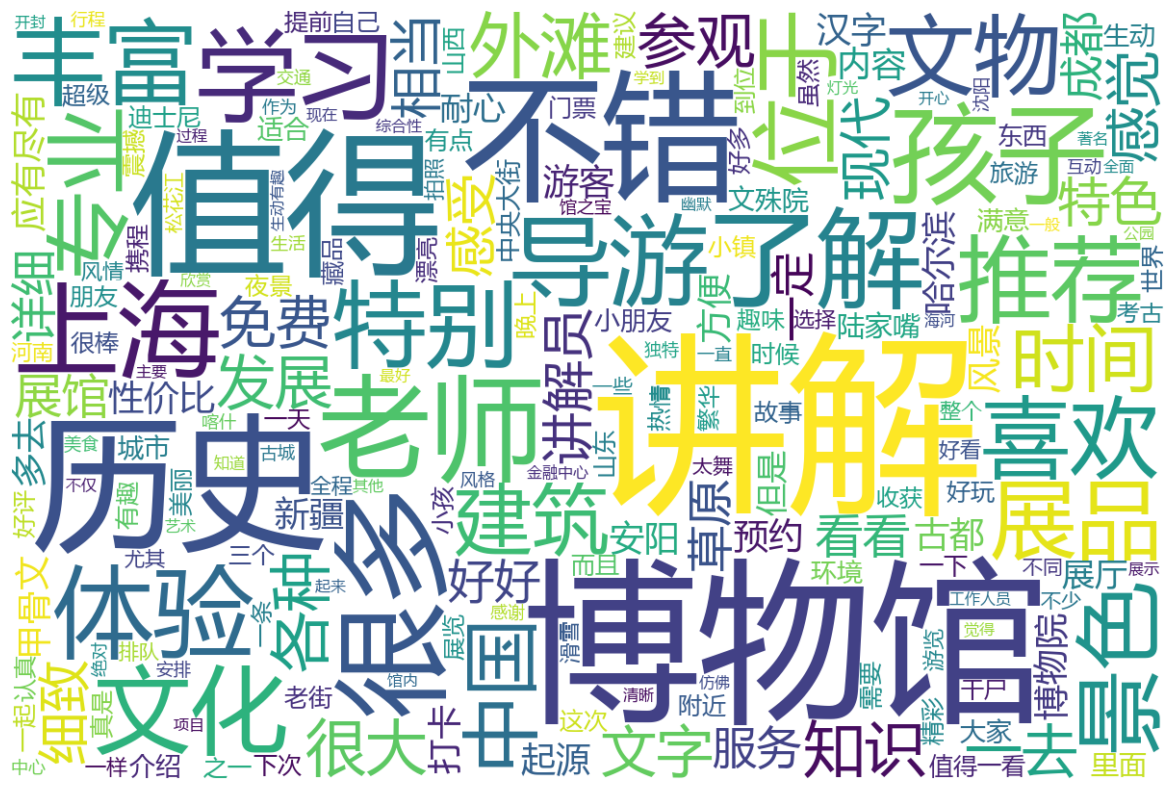

In [1]:
import os
import re
import jieba
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# 1. 读取所有CSV文件并汇总评论（只读取"评论内容"列）
def read_all_comments(folder_path):
    """读取指定文件夹下所有CSV文件的"评论内容"列"""
    all_comments = []
    
    # 获取文件夹中所有CSV文件
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    print(f"找到 {len(csv_files)} 个CSV文件")
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        try:
            # 读取CSV文件，只提取"评论内容"列
            df = pd.read_csv(file_path, encoding='utf-8')
            
            # 检查是否存在"评论内容"列
            if '评论内容' in df.columns:
                comments = df['评论内容'].dropna().astype(str).tolist()
                all_comments.extend(comments)
                print(f"已读取 {file}: {len(comments)} 条评论")
            else:
                print(f"警告: {file} 文件中未找到'评论内容'列")
                
        except Exception as e:
            print(f"读取 {file} 时出错: {e}")
    
    return all_comments

# 2. 文本预处理
def preprocess_text(text_list):
    """文本预处理：去除特殊字符、分词、去除停用词"""
    
    # 合并所有文本
    combined_text = ' '.join(text_list)
    
    # 去除特殊字符和数字
    cleaned_text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z]', ' ', combined_text)
    
    # 使用jieba分词
    words = jieba.lcut(cleaned_text)
    
    # 加载停用词表（可以根据需要扩展）
    stop_words = set([
        '的', '了', '是', '我', '你', '他', '她', '它', '我们', '你们', '他们',
        '这里', '那里', '这个', '那个', '和', '与', '或', '在', '有', '就', '都',
        '很', '非常', '还', '也', '但', '却', '而', '如果', '因为', '所以',
        '可以', '能', '会', '要', '不', '没', '没有', '着', '过', '啊', '呀','一次', '两个', '真的', '就是',
        '哦', '吧', '呢', '吗', '哈哈', '呵呵', '景点', '景区', '地方', '游玩','一个', '小时', '比较', '看到','还是', '还有', '几次', '不是'
    ])
    
    # 过滤停用词和长度为1的词
    filtered_words = [word for word in words if len(word) > 1 and word not in stop_words]
    
    return filtered_words

# 3. 生成词云图
def generate_wordcloud(words, output_path='wordcloud.png'):
    """生成词云图"""
    
    # 统计词频
    word_freq = Counter(words)
    
    # 打印出现频率最高的20个词
    print("\n出现频率最高的20个词：")
    for word, freq in word_freq.most_common(20):
        print(f"{word}: {freq}")
    
    # 设置词云参数
    wc = WordCloud(
        font_path='msyh.ttc',  # Windows系统字体，Mac可用 'Arial Unicode.ttf'
        width=1200,
        height=800,
        background_color='white',
        max_words=200,
        max_font_size=200,
        colormap='viridis'
    )
    
    # 生成词云
    wc.generate_from_frequencies(word_freq)
    
    # 显示并保存词云
    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    
    # 保存图片
    wc.to_file(output_path)
    print(f"\n词云图已保存到: {output_path}")
    
    plt.show()

# 主函数
def main():
    # 设置你的CSV文件夹路径
    folder_path = 'C:/Users/besth/Desktop/A.桌面/香港城市大学/com5507/携程/5507数据/5507数据/5. 79个景点的评论'  # 请修改为你的实际文件夹路径
    
    # 读取所有评论
    print("开始读取评论数据...")
    all_comments = read_all_comments(folder_path)
    print(f"总共读取到 {len(all_comments)} 条评论")
    
    if not all_comments:
        print("没有读取到任何评论数据！")
        return
    
    # 文本预处理
    print("\n开始文本预处理...")
    processed_words = preprocess_text(all_comments)
    print(f"分词后得到 {len(processed_words)} 个词语")
    
    if not processed_words:
        print("预处理后没有有效词语！")
        return
    
    # 生成词云图
    print("\n开始生成词云图...")
    generate_wordcloud(processed_words)

if __name__ == "__main__":
    main()

开始读取并分析评论数据...
找到 79 个CSV文件
已分析 U型公路_评论.csv: 38 条评论
已分析 七彩云南古滇度假区_评论.csv: 231 条评论
已分析 三娘湾_评论.csv: 423 条评论
已分析 上海博物馆(东馆)_评论.csv: 150 条评论
已分析 上海老街_评论.csv: 1008 条评论
已分析 中国文字博物馆_评论.csv: 2718 条评论
已分析 中央大街_评论.csv: 2371 条评论
已分析 乌兰湖_评论.csv: 30 条评论
已分析 五马渡广场_评论.csv: 27 条评论
已分析 全富岛_评论.csv: 47 条评论
已分析 八廓街_评论.csv: 398 条评论
已分析 北海老街_评论.csv: 772 条评论
已分析 南极洛_评论.csv: 13 条评论
已分析 双塔公园_评论.csv: 25 条评论
已分析 吐鲁番博物馆_评论.csv: 325 条评论
已分析 呼伦贝尔大草原_评论.csv: 1134 条评论
已分析 哈巴雪山_评论.csv: 45 条评论
已分析 唐布拉草原_评论.csv: 59 条评论
已分析 喀什古城_评论.csv: 822 条评论
已分析 国殇墓园_评论.csv: 108 条评论
已分析 国清景区_评论.csv: 354 条评论
已分析 外滩_评论.csv: 3000 条评论
已分析 天定山旅游度假小镇_评论.csv: 129 条评论
已分析 太原北齐壁画博物馆_评论.csv: 338 条评论
已分析 太舞滑雪小镇_评论.csv: 1728 条评论
已分析 孔子博物馆_评论.csv: 581 条评论
已分析 宁夏地质博物馆_评论.csv: 610 条评论
已分析 宁明花山岩画景区_评论.csv: 760 条评论
已分析 宜昌三峡旅游度假区_评论.csv: 334 条评论
已分析 宝莲寺_评论.csv: 24 条评论
已分析 山东博物馆_评论.csv: 2680 条评论
已分析 山西博物院_评论.csv: 2101 条评论
已分析 崇武古城_评论.csv: 10 条评论
已分析 巍山古城_评论.csv: 108 条评论
已分析 帕米尔高原_评论.csv: 284 条评论
已分析 延安红街_评论.csv: 306 条评论
已分析 开封博物馆_评论.csv: 3000 条评论
已分析 成都博

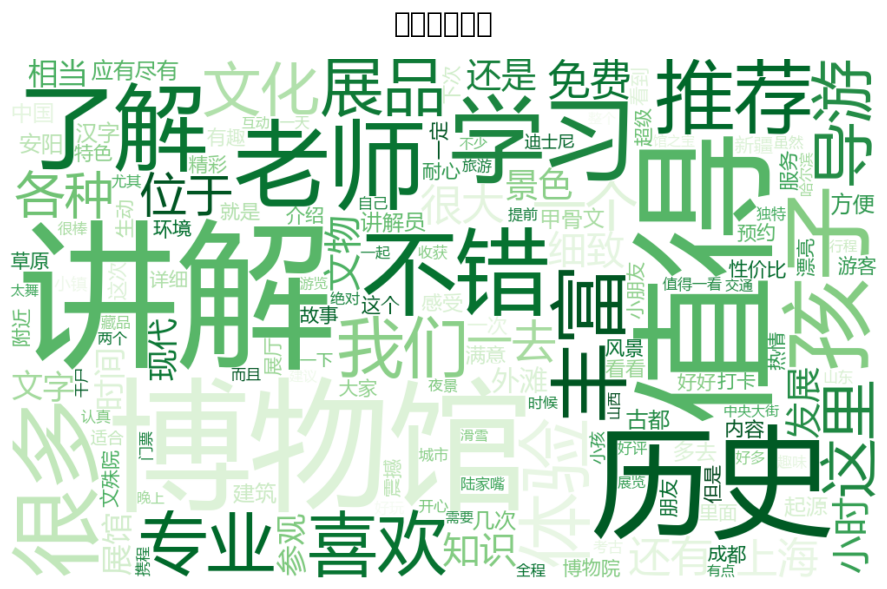

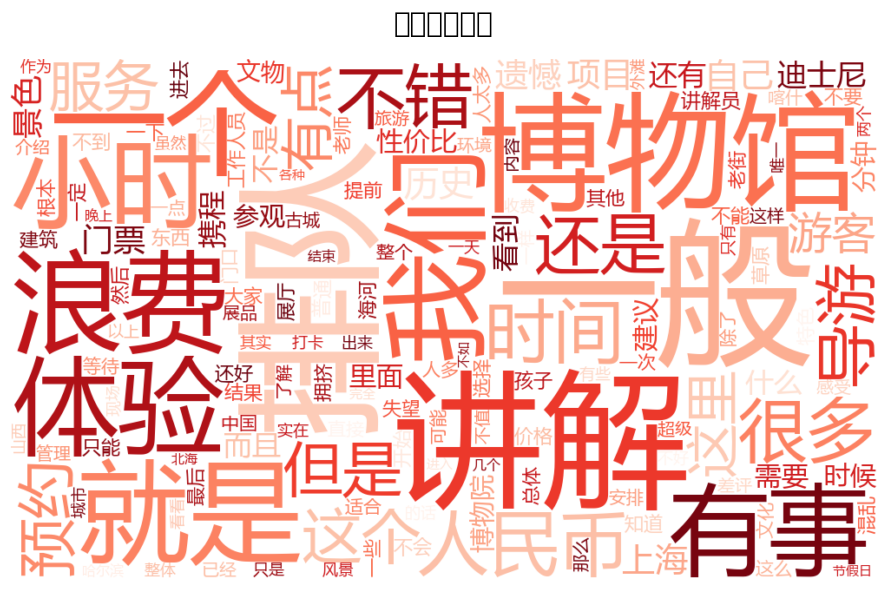

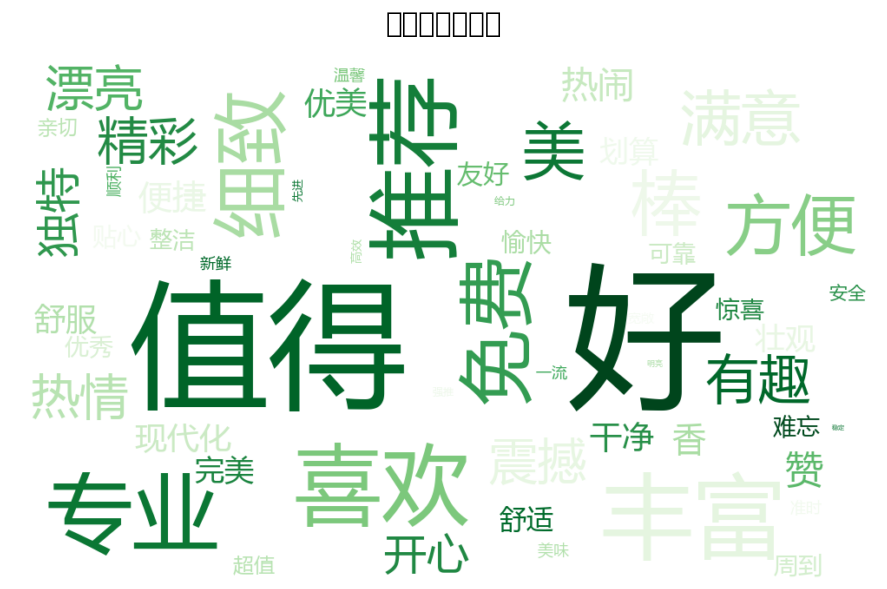

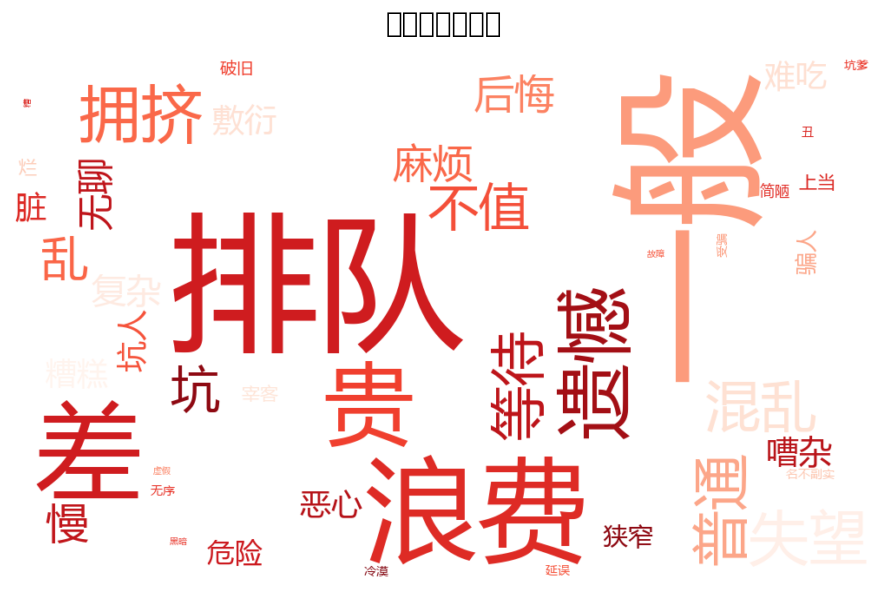

In [3]:
import os
import re
import jieba
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# 加载情感词典
def load_sentiment_dict():
    """加载正面和负面情感词典"""
    # 这里使用内置的基础情感词库，你也可以替换为自定义的词典文件
    positive_words = {
        '好', '棒', '赞', '美', '漂亮', '优秀', '满意', '推荐', '值得', '喜欢','强推','给力',
        '惊喜', '舒适', '方便', '干净', '热情', '友好', '专业', '精彩', '壮观', '现代化', '先进','一流',
        '震撼', '开心', '愉快', '完美', '超值', '划算', '有趣', '难忘', '亲切','清闲', '靠谱', '香',
        '温馨', '独特', '丰富', '美味', '新鲜', '周到', '细致', '贴心', '安全','性价比高', '热闹', '服务好',
        '顺利', '准时', '高效', '整洁', '明亮', '宽敞', '便捷', '可靠', '稳定','免费', '优美', '舒服'
    }
    
    negative_words = {
        '差', '烂', '糟', '丑', '失望', '不满意', '不推荐', '不值', '坑', '贵',
        '脏', '乱', '差', '慢', '差', '敷衍', '冷漠', '不专业', '无聊', '普通',
        '一般', '破旧', '简陋', '拥挤', '嘈杂', '难吃', '不新鲜', '态度差',
        '服务差', '环境差', '设施差', '体验差', '坑爹', '骗人', '排队', '等待',
        '浪费', '后悔', '遗憾', '危险', '不安全', '不卫生', '恶心', '糟糕',
        '麻烦', '复杂', '低效', '黑暗', '狭窄','故障', '损坏'
        '老化', '延误', '混乱', '无序', 
        '坑人', '宰客', '上当', '受骗', '虚假', '夸大', '名不副实', '性价比低'
    }
    
    return positive_words, negative_words

# 情感分析函数
def analyze_sentiment(text, positive_words, negative_words):
    """简单的情感分析，返回情感倾向和情感词"""
    words = jieba.lcut(text)
    
    pos_count = 0
    neg_count = 0
    pos_word_list = []
    neg_word_list = []
    
    for word in words:
        if word in positive_words:
            pos_count += 1
            pos_word_list.append(word)
        elif word in negative_words:
            neg_count += 1
            neg_word_list.append(word)
    
    if pos_count > neg_count:
        return 'positive', pos_word_list, neg_word_list
    elif neg_count > pos_count:
        return 'negative', pos_word_list, neg_word_list
    else:
        return 'neutral', pos_word_list, neg_word_list

# 读取所有CSV文件并进行情感分析
def read_and_analyze_comments(folder_path):
    """读取评论并进行情感分析"""
    positive_comments = []
    negative_comments = []
    neutral_comments = []
    
    all_positive_words = []
    all_negative_words = []
    
    # 加载情感词典
    pos_dict, neg_dict = load_sentiment_dict()
    
    # 获取文件夹中所有CSV文件
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    print(f"找到 {len(csv_files)} 个CSV文件")
    
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        try:
            # 读取CSV文件，只提取"评论内容"列
            df = pd.read_csv(file_path, encoding='utf-8')
            
            if '评论内容' in df.columns:
                comments = df['评论内容'].dropna().astype(str).tolist()
                
                for comment in comments:
                    sentiment, pos_words, neg_words = analyze_sentiment(comment, pos_dict, neg_dict)
                    
                    if sentiment == 'positive':
                        positive_comments.append(comment)
                        all_positive_words.extend(pos_words)
                    elif sentiment == 'negative':
                        negative_comments.append(comment)
                        all_negative_words.extend(neg_words)
                    else:
                        neutral_comments.append(comment)
                
                print(f"已分析 {file}: {len(comments)} 条评论")
            else:
                print(f"警告: {file} 文件中未找到'评论内容'列")
                
        except Exception as e:
            print(f"读取 {file} 时出错: {e}")
    
    print(f"\n情感分析结果统计:")
    print(f"正面评论: {len(positive_comments)} 条")
    print(f"负面评论: {len(negative_comments)} 条")
    print(f"中性评论: {len(neutral_comments)} 条")
    
    return positive_comments, negative_comments, all_positive_words, all_negative_words

# 文本预处理
def preprocess_text(text_list):
    """文本预处理"""
    combined_text = ' '.join(text_list)
    cleaned_text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z]', ' ', combined_text)
    words = jieba.lcut(cleaned_text)
    
    stop_words = set([
        '的', '了', '是', '我', '你', '他', '在', '有', '就', '都', '很', '还', '也',
        '这', '那', '和', '但', '而', '如果', '因为', '所以', '可以', '能', '会', '要',
        '不', '没', '没有', '着', '过', '景点', '景区', '地方', '游玩', '去', '来',
        '看', '玩', '到', '比较', '觉得', '感觉', '真的', '非常', '特别'
    ])
    
    filtered_words = [word for word in words if len(word) > 1 and word not in stop_words]
    return filtered_words

# 生成词云图
def generate_wordcloud(words, title, output_path):
    """生成词云图"""
    word_freq = Counter(words)
    
    print(f"\n{title} 高频词TOP15:")
    for word, freq in word_freq.most_common(15):
        print(f"{word}: {freq}")
    
    # 设置不同的颜色方案区分正负情感
    if '正面' in title:
        colormap = 'Greens'  # 正面用绿色系
    elif '负面' in title:
        colormap = 'Reds'    # 负面用红色系
    else:
        colormap = 'viridis'
    
    wc = WordCloud(
        font_path='msyh.ttc',
        width=1000,
        height=600,
        background_color='white',
        max_words=150,
        max_font_size=180,
        colormap=colormap
    )
    
    wc.generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    
    wc.to_file(output_path)
    print(f"{title}词云图已保存到: {output_path}")
    
    return plt

# 主函数
def main():
    folder_path = 'C:/Users/besth/Desktop/A.桌面/香港城市大学/com5507/携程/5507数据/5507数据/5. 79个景点的评论'  # 修改为你的文件夹路径
    
    print("开始读取并分析评论数据...")
    pos_comments, neg_comments, pos_words, neg_words = read_and_analyze_comments(folder_path)
    
    if not pos_comments and not neg_comments:
        print("没有足够的评论数据进行分析！")
        return
    
    # 预处理文本生成词云
    if pos_comments:
        print("\n处理正面评论...")
        pos_processed = preprocess_text(pos_comments)
        pos_fig = generate_wordcloud(pos_processed, '正面评论词云', 'positive_wordcloud.png')
    
    if neg_comments:
        print("\n处理负面评论...")
        neg_processed = preprocess_text(neg_comments)
        neg_fig = generate_wordcloud(neg_processed, '负面评论词云', 'negative_wordcloud.png')
    
    # 也可以基于情感关键词生成词云
    if pos_words:
        generate_wordcloud(pos_words, '正面情感关键词', 'positive_keywords.png')
    
    if neg_words:
        generate_wordcloud(neg_words, '负面情感关键词', 'negative_keywords.png')
    
    plt.show()

if __name__ == "__main__":
    main()

开始分析 79 个景点的评论数据...

景点评论描述性统计分析报告

📊 整体概况:
分析景点数量: 79
总评论数量: 64488
平均每个景点评论数: 816.3

🔥 评论热度排名 (TOP15):
 1. 迪士尼小镇_评论: 3000 条评论
 2. 湖南省博物馆_评论: 3000 条评论
 3. 湖北省博物馆_评论: 3000 条评论
 4. 河南博物院_评论: 3000 条评论
 5. 辽宁省博物馆_评论: 3000 条评论
 6. 新疆维吾尔自治区博物馆_评论: 3000 条评论
 7. 成都博物馆_评论: 3000 条评论
 8. 开封博物馆_评论: 3000 条评论
 9. 外滩_评论: 3000 条评论
10. 陆家嘴_评论: 2975 条评论
11. 中国文字博物馆_评论: 2718 条评论
12. 山东博物馆_评论: 2680 条评论
13. 文殊院_评论: 2614 条评论
14. 中央大街_评论: 2371 条评论
15. 沈阳博物馆_评论: 2113 条评论

📝 评论详细程度分析:
评论最详细的景点 (平均字符数TOP5):
   南极洛_评论: 平均 299.15 字符
   崇武古城_评论: 平均 183.8 字符
   景迈山茶林文化景区_评论: 平均 180.13 字符
   哈巴雪山_评论: 平均 171.29 字符
   宝莲寺_评论: 平均 159.54 字符

🎯 词汇丰富度分析:
词汇最丰富的景点 (型次比TOP5):
   珠穆朗玛峰国家公园_评论: 型次比 0.7849
   鲤鱼山公园_评论: 型次比 0.715
   象湖万寿宫_评论: 型次比 0.7126
   宝莲寺_评论: 型次比 0.6808
   景迈山茶林文化景区_评论: 型次比 0.6776


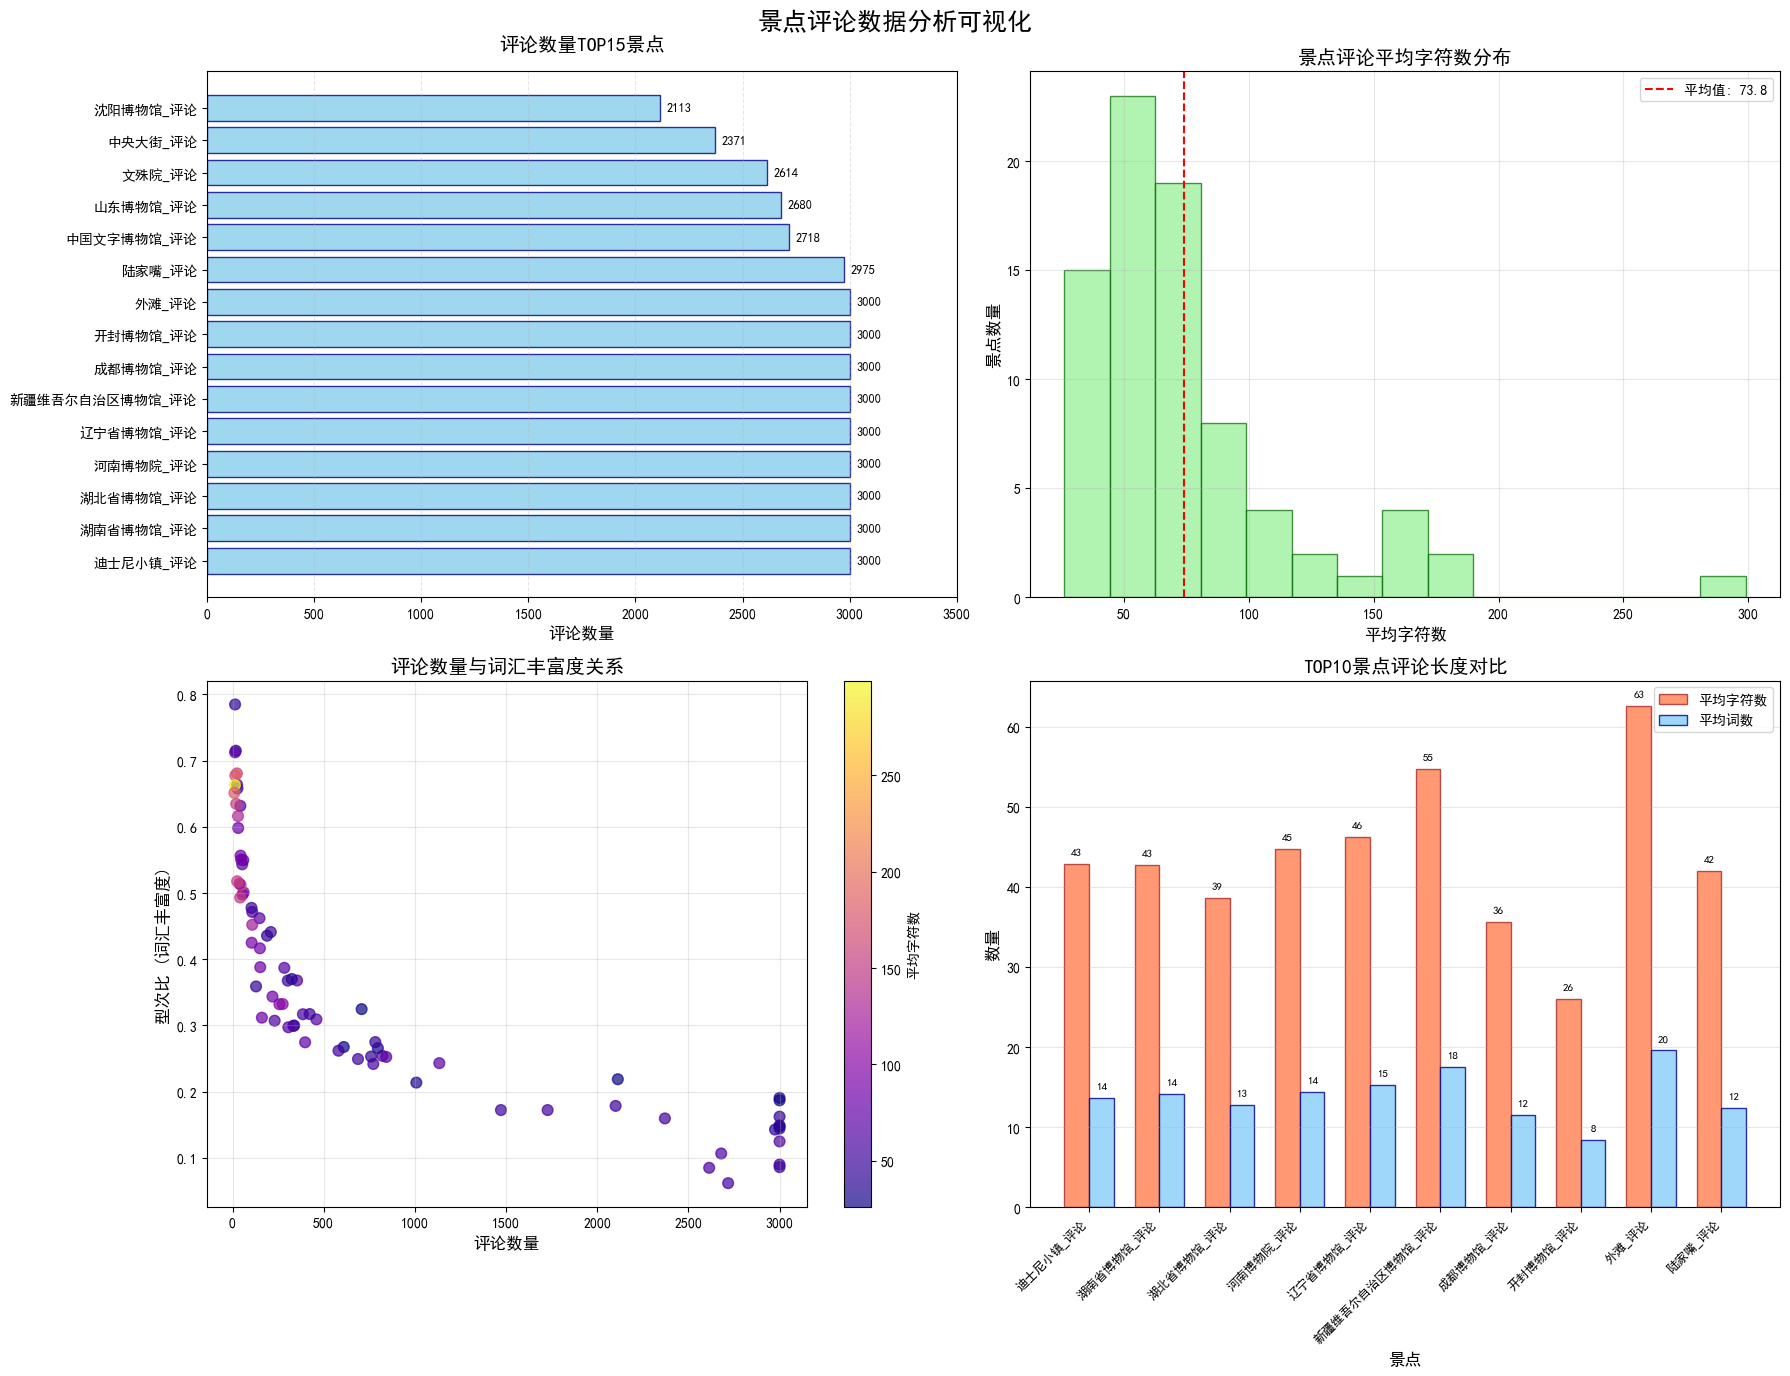

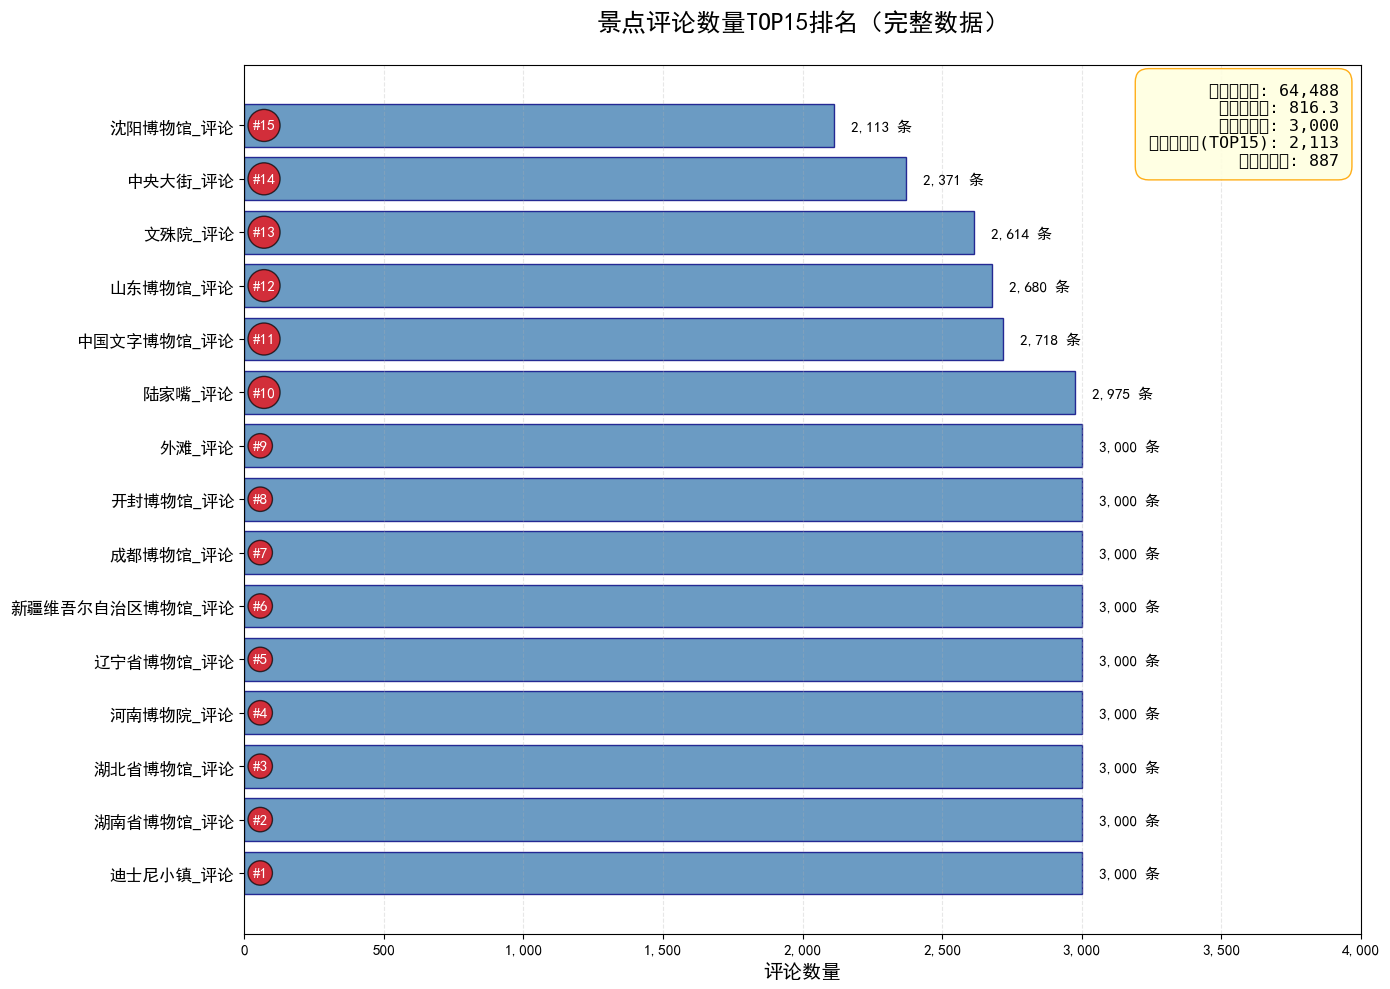

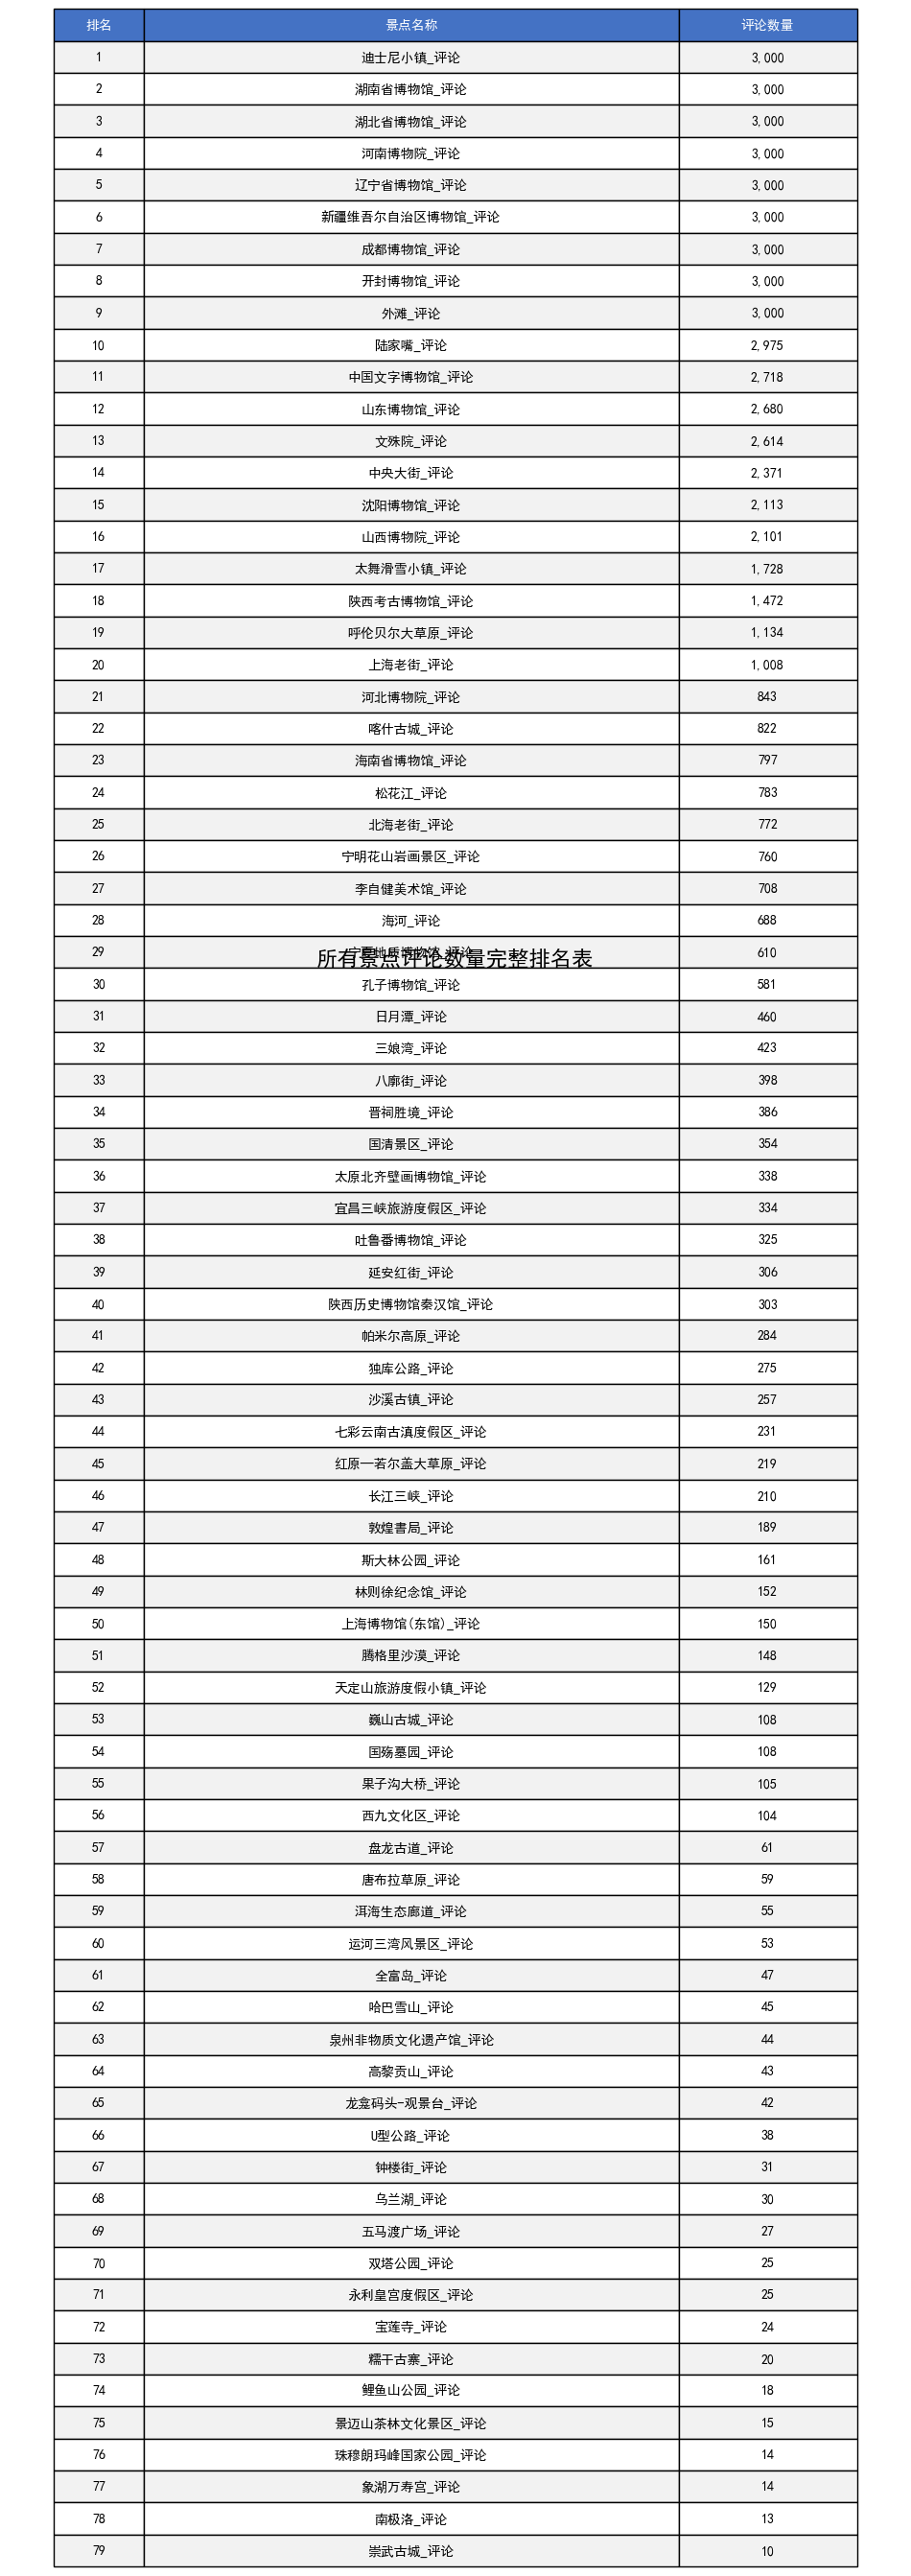


分析结果已导出到: 景点评论统计分析.xlsx


In [7]:
import os
import re
import jieba
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

class CommentAnalyzer:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.results = defaultdict(dict)  # 存储每个景点的分析结果
        
    def get_scenic_name(self, filename):
        """从文件名中提取景点名称（去除.csv后缀）"""
        return os.path.splitext(filename)[0]
    
    def analyze_single_file(self, file_path, scenic_name):
        """分析单个CSV文件"""
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
            
            if '评论内容' not in df.columns:
                print(f"警告: {scenic_name} 没有'评论内容'列")
                return None
            
            # 获取评论内容并清理
            comments = df['评论内容'].dropna().astype(str).tolist()
            comments = [c.strip() for c in comments if c.strip()]
            
            if not comments:
                print(f"警告: {scenic_name} 没有有效评论")
                return None
            
            # 1. 评论数量
            comment_count = len(comments)
            
            # 2. 评论长度分析
            char_lengths = [len(comment) for comment in comments]
            word_lengths = []
            all_words = []
            
            for comment in comments:
                # 分词
                words = jieba.lcut(re.sub(r'[^\u4e00-\u9fa5a-zA-Z]', '', comment))
                words = [word for word in words if len(word) > 1]  # 过滤单字
                word_lengths.append(len(words))
                all_words.extend(words)
            
            # 字符数统计
            avg_char_length = np.mean(char_lengths)
            median_char_length = np.median(char_lengths)
            std_char_length = np.std(char_lengths)
            
            # 词数统计
            avg_word_length = np.mean(word_lengths) if word_lengths else 0
            median_word_length = np.median(word_lengths) if word_lengths else 0
            
            # 3. 词汇丰富度分析
            total_words = len(all_words)
            unique_words = len(set(all_words))
            type_token_ratio = unique_words / total_words if total_words > 0 else 0
            
            # 词频统计
            word_freq = Counter(all_words)
            top_words = word_freq.most_common(10)
            
            return {
                '评论数量': comment_count,
                '平均字符数': round(avg_char_length, 2),
                '字符数中位数': median_char_length,
                '字符数标准差': round(std_char_length, 2),
                '平均词数': round(avg_word_length, 2),
                '词数中位数': median_word_length,
                '总词汇数': total_words,
                '独特词汇数': unique_words,
                '型次比': round(type_token_ratio, 4),
                '热门词汇': top_words,
                '评论列表': comments
            }
            
        except Exception as e:
            print(f"分析 {scenic_name} 时出错: {str(e)}")
            return None
    
    def analyze_all_scenic_spots(self):
        """分析所有景点"""
        csv_files = [f for f in os.listdir(self.folder_path) if f.endswith('.csv')]
        
        print(f"开始分析 {len(csv_files)} 个景点的评论数据...\n")
        
        for file in csv_files:
            scenic_name = self.get_scenic_name(file)
            file_path = os.path.join(self.folder_path, file)
            
            result = self.analyze_single_file(file_path, scenic_name)
            if result:
                self.results[scenic_name] = result
        
        # 转换为DataFrame便于排序和展示
        self.df_results = pd.DataFrame(self.results).T
        self.df_results = self.df_results.sort_values('评论数量', ascending=False)
        
        return self.df_results
    
    def generate_summary_report(self):
        """生成汇总报告"""
        if not hasattr(self, 'df_results'):
            print("请先运行分析！")
            return
        
        print("="*80)
        print("景点评论描述性统计分析报告")
        print("="*80)
        
        # 整体统计
        total_comments = self.df_results['评论数量'].sum()
        avg_comments_per_scenic = self.df_results['评论数量'].mean()
        
        print(f"\n📊 整体概况:")
        print(f"分析景点数量: {len(self.df_results)}")
        print(f"总评论数量: {total_comments}")
        print(f"平均每个景点评论数: {avg_comments_per_scenic:.1f}")
        
        print(f"\n🔥 评论热度排名 (TOP15):")
        top15_by_comments = self.df_results['评论数量'].head(15)
        for i, (scenic, count) in enumerate(top15_by_comments.items(), 1):
            print(f"{i:2d}. {scenic}: {count} 条评论")
        
        print(f"\n📝 评论详细程度分析:")
        detailed_scenic = self.df_results.sort_values('平均字符数', ascending=False).head(5)
        print("评论最详细的景点 (平均字符数TOP5):")
        for scenic, row in detailed_scenic.iterrows():
            print(f"   {scenic}: 平均 {row['平均字符数']} 字符")
        
        print(f"\n🎯 词汇丰富度分析:")
        rich_scenic = self.df_results.sort_values('型次比', ascending=False).head(5)
        print("词汇最丰富的景点 (型次比TOP5):")
        for scenic, row in rich_scenic.iterrows():
            print(f"   {scenic}: 型次比 {row['型次比']}")
        
        return {
            '总景点数': len(self.df_results),
            '总评论数': total_comments,
            '评论最多景点': self.df_results.index[0],
            '评论最多数量': self.df_results['评论数量'].iloc[0],
            '平均字符数最高景点': self.df_results.sort_values('平均字符数', ascending=False).index[0],
            '词汇最丰富景点': self.df_results.sort_values('型次比', ascending=False).index[0]
        }
    
    def create_visualizations(self):
        """创建可视化图表"""
        if not hasattr(self, 'df_results'):
            print("请先运行分析！")
            return
        
        # 创建子图
        fig, axes = plt.subplots(2, 2, figsize=(18, 14))
        fig.suptitle('景点评论数据分析可视化', fontsize=18, fontweight='bold', y=0.98)
        
        # 1. 评论数量排名TOP15 - 完全自定义X轴
        top15_comments = self.df_results['评论数量'].head(15)
        ax1 = axes[0, 0]
        
        # 创建水平柱状图
        bars1 = ax1.barh(range(len(top15_comments)), top15_comments.values, 
                        color='skyblue', alpha=0.8, edgecolor='navy')
        
        # 设置Y轴标签
        ax1.set_yticks(range(len(top15_comments)))
        ax1.set_yticklabels(top15_comments.index, fontsize=10)
        
        # 完全自定义X轴，确保显示所有数据
        max_value = top15_comments.max()
        min_value = 0
        # 设置X轴范围
        ax1.set_xlim(min_value, max_value * 1.1)
        
        # 手动设置X轴刻度，确保显示完整数值
        # 根据最大值自动生成合适的刻度
        if max_value > 5000:
            step = 1000
        elif max_value > 1000:
            step = 500
        elif max_value > 500:
            step = 200
        else:
            step = 100
            
        ax1.set_xticks(range(min_value, int(max_value * 1.1) + step, step))
        ax1.set_xticklabels([str(x) for x in range(min_value, int(max_value * 1.1) + step, step)])
        
        # 添加网格线便于读数
        ax1.grid(axis='x', alpha=0.3, linestyle='--')
        
        # 为每个柱子添加数值标签
        for i, (bar, value) in enumerate(zip(bars1, top15_comments.values)):
            ax1.text(bar.get_width() + max_value * 0.01, 
                    bar.get_y() + bar.get_height()/2,
                    f'{int(value)}', 
                    va='center', ha='left', fontsize=9, fontweight='bold')
        
        ax1.set_xlabel('评论数量', fontsize=12)
        ax1.set_title('评论数量TOP15景点', fontsize=14, fontweight='bold', pad=15)
        
        # 2. 平均字符数分布
        ax2 = axes[0, 1]
        ax2.hist(self.df_results['平均字符数'], bins=15, alpha=0.7, color='lightgreen', edgecolor='darkgreen')
        ax2.set_xlabel('平均字符数', fontsize=12)
        ax2.set_ylabel('景点数量', fontsize=12)
        ax2.set_title('景点评论平均字符数分布', fontsize=14, fontweight='bold')
        ax2.axvline(self.df_results['平均字符数'].mean(), color='red', 
                   linestyle='--', label=f'平均值: {self.df_results["平均字符数"].mean():.1f}')
        ax2.legend(fontsize=10)
        ax2.grid(alpha=0.3)
        
        # 3. 型次比vs评论数量散点图
        ax3 = axes[1, 0]
        scatter = ax3.scatter(self.df_results['评论数量'], self.df_results['型次比'], 
                            c=self.df_results['平均字符数'], cmap='plasma', alpha=0.7, s=60)
        ax3.set_xlabel('评论数量', fontsize=12)
        ax3.set_ylabel('型次比 (词汇丰富度)', fontsize=12)
        ax3.set_title('评论数量与词汇丰富度关系', fontsize=14, fontweight='bold')
        ax3.grid(alpha=0.3)
        cbar = plt.colorbar(scatter, ax=ax3, label='平均字符数')
        cbar.ax.tick_params(labelsize=10)
        
        # 4. 评论详细程度对比
        ax4 = axes[1, 1]
        top10_scenic = self.df_results.head(10)
        x = range(len(top10_scenic))
        width = 0.35
        
        bars1 = ax4.bar([i - width/2 for i in x], top10_scenic['平均字符数'], 
                       width, label='平均字符数', alpha=0.8, color='coral', edgecolor='brown')
        bars2 = ax4.bar([i + width/2 for i in x], top10_scenic['平均词数'], 
                       width, label='平均词数', alpha=0.8, color='lightskyblue', edgecolor='navy')
        
        # 添加数值标签
        for bar in bars1:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.0f}', ha='center', va='bottom', fontsize=8)
        
        for bar in bars2:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.0f}', ha='center', va='bottom', fontsize=8)
        
        ax4.set_xlabel('景点', fontsize=12)
        ax4.set_ylabel('数量', fontsize=12)
        ax4.set_title('TOP10景点评论长度对比', fontsize=14, fontweight='bold')
        ax4.set_xticks(x)
        ax4.set_xticklabels(top10_scenic.index, rotation=45, ha='right', fontsize=9)
        ax4.legend(fontsize=10)
        ax4.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('景点评论分析报告.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 额外生成一个单独的评论数量详细排名图
        self.create_detailed_comment_count_chart()
    
    def create_detailed_comment_count_chart(self):
        """创建详细的评论数量排名图表（确保X轴显示完整）"""
        # 创建更大的图表展示所有TOP15数据
        plt.figure(figsize=(14, 10))
        
        # 获取TOP15数据
        top15_comments = self.df_results['评论数量'].head(15)
        max_value = top15_comments.max()
        min_value = 0
        
        # 创建水平柱状图
        bars = plt.barh(range(len(top15_comments)), top15_comments.values,
                       color='steelblue', alpha=0.8, edgecolor='navy', linewidth=1)
        
        # 设置Y轴标签
        plt.yticks(range(len(top15_comments)), top15_comments.index, fontsize=12)
        
        # 强制设置X轴范围和刻度，确保显示完整
        plt.xlim(min_value, max_value * 1.2)
        
        # 根据最大值动态设置刻度间隔
        if max_value >= 10000:
            tick_step = 2000
        elif max_value >= 5000:
            tick_step = 1000
        elif max_value >= 2000:
            tick_step = 500
        elif max_value >= 1000:
            tick_step = 200
        else:
            tick_step = 100
        
        # 设置X轴刻度
        xticks = list(range(min_value, int(max_value * 1.2) + tick_step, tick_step))
        plt.xticks(xticks, [f'{x:,}' for x in xticks], fontsize=11)
        
        # 添加网格线
        plt.grid(axis='x', alpha=0.3, linestyle='--')
        
        # 为每个柱子添加详细的数值标签
        for i, (bar, value) in enumerate(zip(bars, top15_comments.values)):
            # 柱子上的数值（格式化显示）
            plt.text(bar.get_width() + max_value * 0.02, 
                    bar.get_y() + bar.get_height()/2,
                    f'{int(value):,} 条', 
                    va='center', ha='left', fontsize=11, fontweight='bold')
            
            # 排名标签
            plt.text(max_value * 0.01, 
                    bar.get_y() + bar.get_height()/2,
                    f'#{i+1}', 
                    va='center', ha='left', fontsize=11, fontweight='bold',
                    color='white', bbox=dict(boxstyle="circle,pad=0.3", fc="red", ec="black", alpha=0.7))
        
        plt.xlabel('评论数量', fontsize=14)
        plt.title('景点评论数量TOP15排名（完整数据）', fontsize=18, fontweight='bold', pad=25)
        
        # 添加统计信息文本框
        stats_text = f"""总计评论数: {self.df_results['评论数量'].sum():,}
平均评论数: {self.df_results['评论数量'].mean():.1f}
最大评论数: {max_value:,}
最小评论数(TOP15): {top15_comments.min():,}
评论数差距: {max_value - top15_comments.min():,}"""
        
        plt.text(0.98, 0.98, stats_text, 
                transform=plt.gca().transAxes, 
                va='top', ha='right', 
                bbox=dict(boxstyle="round,pad=0.8", fc="lightyellow", ec="orange", alpha=0.9),
                fontsize=12, family='monospace')
        
        # 确保布局紧凑
        plt.tight_layout()
        
        # 保存高分辨率图片
        plt.savefig('评论数量TOP15详细排名.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 额外生成纯数据表格图
        self.create_comment_count_table()
    
    def create_comment_count_table(self):
        """创建评论数量纯数据表格，确保完整显示"""
        # 获取所有景点的评论数量数据
        comment_data = self.df_results['评论数量'].sort_values(ascending=False)
        
        # 创建图表
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis('tight')
        ax.axis('off')
        
        # 准备表格数据
        table_data = []
        for i, (scenic, count) in enumerate(comment_data.items(), 1):
            table_data.append([i, scenic, f'{count:,}'])
        
        # 创建表格
        table = ax.table(cellText=table_data,
                        colLabels=['排名', '景点名称', '评论数量'],
                        cellLoc='center',
                        loc='center',
                        colWidths=[0.1, 0.6, 0.2])
        
        # 设置表格样式
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 2)
        
        # 设置表头样式
        for (i, j), cell in table.get_celld().items():
            if i == 0:  # 表头
                cell.set_text_props(weight='bold', color='white')
                cell.set_facecolor('#4472C4')
            elif i % 2 == 1:  # 奇数行
                cell.set_facecolor('#F2F2F2')
        
        plt.title('所有景点评论数量完整排名表', fontsize=16, fontweight='bold', pad=20)
        plt.savefig('所有景点评论数量排名表.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def export_to_excel(self, filename='景点评论统计分析.xlsx'):
        """导出结果到Excel"""
        if not hasattr(self, 'df_results'):
            print("请先运行分析！")
            return
        
        # 创建Excel写入器
        with pd.ExcelWriter(filename, engine='openpyxl') as writer:
            # 主要统计结果
            main_results = self.df_results.drop(['热门词汇', '评论列表'], axis=1)
            main_results.to_excel(writer, sheet_name='统计汇总')
            
            # 创建专门的评论数量排名表
            comment_ranking = pd.DataFrame({
                '排名': range(1, len(self.df_results) + 1),
                '景点名称': self.df_results.index,
                '评论数量': self.df_results['评论数量'].values
            })
            comment_ranking.to_excel(writer, sheet_name='评论数量排名', index=False)
            
            # 为每个景点创建详细工作表
            for scenic_name, data in self.results.items():
                # 创建详细数据表
                detail_data = {
                    '统计指标': list(data.keys())[:-2],  # 排除热门词汇和评论列表
                    '数值': list(data.values())[:-2]
                }
                df_detail = pd.DataFrame(detail_data)
                
                # 添加热门词汇表
                top_words_df = pd.DataFrame(data['热门词汇'], 
                                          columns=['词汇', '频次'])
                
                # 写入不同工作表
                df_detail.to_excel(writer, sheet_name=f'{scenic_name}_统计', index=False)
                top_words_df.to_excel(writer, sheet_name=f'{scenic_name}_热门词汇', index=False)
        
        print(f"\n分析结果已导出到: {filename}")

# 主程序
def main():
    # 设置文件夹路径
    folder_path = 'C:/Users/besth/Desktop/A.桌面/香港城市大学/com5507/携程/5507数据/5507数据/5. 79个景点的评论'  # 修改为你的CSV文件所在路径
    
    # 创建分析器实例
    analyzer = CommentAnalyzer(folder_path)
    
    # 执行分析
    results_df = analyzer.analyze_all_scenic_spots()
    
    # 生成报告
    summary = analyzer.generate_summary_report()
    
    # 创建可视化
    analyzer.create_visualizations()
    
    # 导出到Excel
    analyzer.export_to_excel()
    
    return analyzer, results_df

if __name__ == "__main__":
    analyzer, results = main()